# Introduction to Machine Learning for Chemists in Python


This is a Jupyter Notebook. The Jupyter Notebook is an open source web application that you can use to create and share documents that contain live code, equations, visualizations, and text. The underlying programming languadge is Python. 

Each cell can be executed independently. Running a cell means that you will execute the cell’s contents. To execute a cell, you can just select the cell and click the Run button. If you prefer using your keyboard, you can just press Shift+Enter. 

To know more about Jupyter Notebooks: https://realpython.com/jupyter-notebook-introduction/

First, let us import all the modules we need to start our tutorial on *Machine Learning* :

In [ ]:
# pip install xlrd

In [ ]:
import numpy as np  #The numpy package
import pandas as pd # The pandas data framework
import matplotlib.pyplot as plt # The plotting library
import sklearn as sklearn # General purpose ML framework for python
import tensorflow as tensorflow #Tensor Flow framework

# Basic Libraries

-   **NumPy**: NumPy is a fundamental library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
-   **Pandas**: Pandas is a tool enabling to hadle and analyze tabular data e.g., spreadsheets or databases. 
-   **matplotlib**:
-   **Sci-kit Learn**:
-   **TensorFlow**:
- **Atomic Simulator Environment (ASE)**:

Now that all the libraries got imported we can check which library versions we are running:

In [ ]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)


Numpy Version 1.19.5
Pandas Version 1.2.4


In [ ]:
# %matplotlib inline

In [ ]:
np.random.seed(42)

# Catalysis example
## Based on: A Primer about Machine Learning in Catalysis – A Tutorial with Code
#### https://chemistry-europe.onlinelibrary.wiley.com/doi/epdf/10.1002/cctc.202000234


The following tutorial is focused on the oxidative coupling of methane (OCM) described as

2 CH<sub>4</sub> + O<sub>2</sub> -> C<sub>2</sub>H<sub>4</sub> + 2 H<sub>2</sub>O.

A good OCM catalyst contains at least two elemenst from the following list: Sr, Ba, Mg, Ca, La, Nd, Sm, Ga, Bi, Mo, W, Mn, Re, Li, Na, Cs, F, Cl. At the same time, one of them needs to be able to form a carbonate while the second element is in a thermally stable form. This leads to a catalyst composed of stable oxide and active species. 

Following tutorial will draw some conclusions from the published data on the catalysts using various ML workflows introduced in previous sections.

In [ ]:
#Data are available as an Excel file 
url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-019-08325-8/MediaObjects/41467_2019_8325_MOESM3_ESM.xls'

In [ ]:
# This creates a pandas DataFrame using data in url, a sort of a table with a lot of data science functionalities implemented.
raw_data = pd.read_excel(url, sheet_name=1)

In [ ]:
raw_data.head()

,Catalyst Nr,Nr of publication,Cation 1,Cation 1 mol%,Cation 2,Cation 2 mol%,Cation 3,Cation 3 mol%,Cation 4,Cation 4 mol%,...,p(CH4)/p(O2),"p total, bar","Contact time, s","X(O2), %","X(CH4), %","S(COx), %","S(C2=), %","S(C2-), %","S(C2), %","Y(C2), %"
0,1,1,Mn,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,11.0,NaN,NaN,NaN,45.500000,5.0050
1,2,1,Cd,4.7,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,10.0,NaN,NaN,NaN,40.000000,4.0000
2,3,1,Sn,4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,8.4,NaN,NaN,NaN,4.800000,0.4032
3,4,1,Ti,10.4,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,6.8,NaN,NaN,NaN,44.099998,2.9988
4,5,1,Pt,2.8,NaN,NaN,NaN,NaN,NaN,NaN,...,4.761905,1.013,0.04,NaN,8.0,NaN,NaN,NaN,1.300000,0.1040


In [ ]:

# This cell basically collects the important data. It can be skipped.
# We collect the relevant data
# Pivot function sort original columns with respect to the elements
cation1 = raw_data.pivot(columns='Cation 1', values='Cation 1 mol%')
cation2 = raw_data.pivot(columns='Cation 2', values='Cation 2 mol%')
cation3 = raw_data.pivot(columns='Cation 3', values='Cation 3 mol%')
cation4 = raw_data.pivot(columns='Cation 4', values='Cation 4 mol%')
anion1 = raw_data.pivot(columns='Anion 1', values='Anion 1 mol%')
anion2 = raw_data.pivot(columns='Anion 2', values='Anion 2 mol%')
support1 = raw_data.pivot(columns='Support 1', values='Support 1 mol%')
support2 = raw_data.pivot(columns='Support 2', values='Support 2 mol%')

#We need to create a pivot_list which holds the single pivoted tables and combine them together with concat

pivot_lists = [cation1, cation2, cation3, cation4, anion1, anion2, support1, support2]
concat_pivot_lists = pd.concat(pivot_lists, axis=1, sort=True)
# Here we collect the percentage of composition of each element
composition = concat_pivot_lists.groupby(level=0, axis=1).sum()/100
# Extraction of the publication numbers pub_nr and reaction conditions
pub_nr = raw_data.iloc[:,0]
reaction_data = raw_data.iloc[:,19:]

cleaned_list = [pub_nr, composition, reaction_data]
data_cleaned = pd.concat(cleaned_list, axis=1, sort=True)

In [ ]:
# This is the clean data that we can use for the analysis
data_cleaned.head()

,Catalyst Nr,Ag,Al,Au,B,Ba,Be,Bi,Br,C,...,p(CH4)/p(O2),"p total, bar","Contact time, s","X(O2), %","X(CH4), %","S(COx), %","S(C2=), %","S(C2-), %","S(C2), %","Y(C2), %"
0,1,0.0,0.908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.761905,1.013,0.04,NaN,11.0,NaN,NaN,NaN,45.500000,5.0050
1,2,0.0,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.761905,1.013,0.04,NaN,10.0,NaN,NaN,NaN,40.000000,4.0000
2,3,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.761905,1.013,0.04,NaN,8.4,NaN,NaN,NaN,4.800000,0.4032
3,4,0.0,0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.761905,1.013,0.04,NaN,6.8,NaN,NaN,NaN,44.099998,2.9988
4,5,0.0,0.972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.761905,1.013,0.04,NaN,8.0,NaN,NaN,NaN,1.300000,0.1040


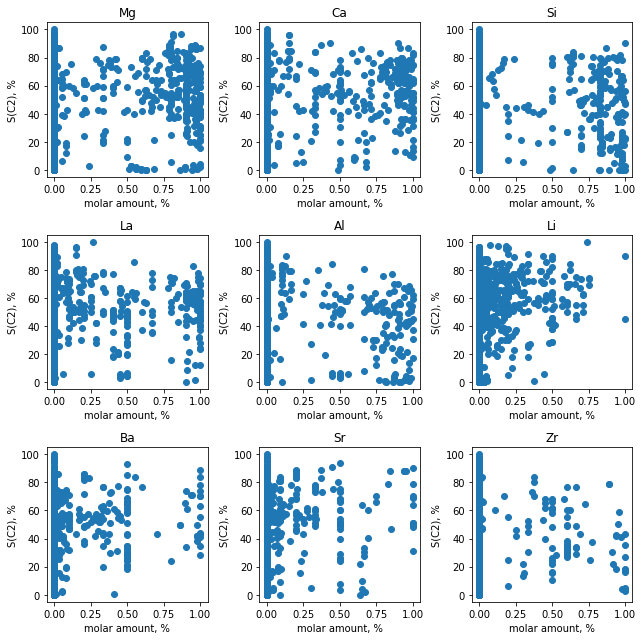

In [ ]:
fig, axes = plt.subplots(figsize=[9,9], ncols=3, nrows=3)

most_common_elements = composition.mean(axis=0).sort_values(ascending=False).head(9).keys()

for i, element in enumerate(most_common_elements):
    ax = axes.ravel()[i]
    ax.set_title(element)
    ax.set_xlabel('molar amount, %')
    ax.set_ylabel('S(C2), %')
    ax.scatter(x=data_cleaned[element], y=data_cleaned['S(C2), %'])

plt.tight_layout()
plt.show()

# Unsupervised Learning 
### Libraries loaded from Scikit-Learn (https://scikit-learn.org/stable/index.html) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
composition.head()

,Ag,Al,Au,B,Ba,Be,Bi,Br,C,Ca,...,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr
0,0.0,0.908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.104,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## K-Means
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. (https://scikit-learn.org/stable/modules/clustering.html#k-means)

To find out how many clusters should be ideally used, the "elbow method" can be used.
With each cluster the sum of squared distances decreases, evntually converging to zero if each point is a cluster. The optimal amount of clusters per point is given by the "elbow" of the plotted curve.

In [ ]:
#K-Means Clustering
# "Elbow curve" helps to define suitable number of clusters 
k_ellbow = []
for E in range(1,15):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(composition)
    score = kmeans.score(composition)
    k_ellbow.append(score)

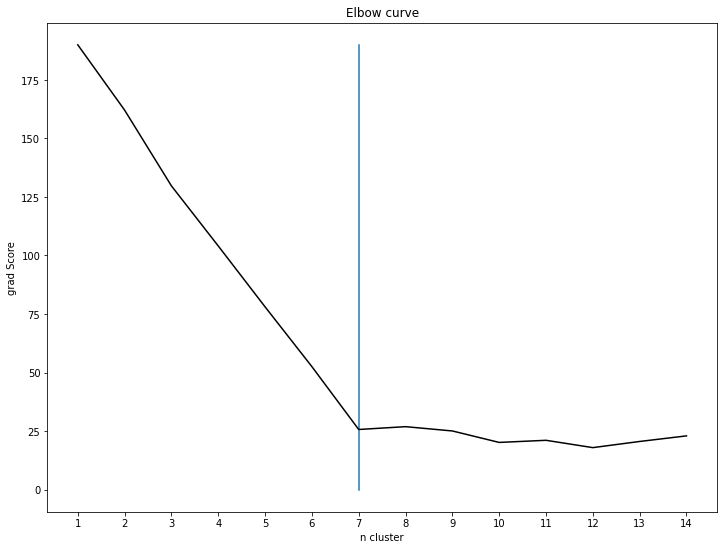

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Elbow curve')
plt.xlabel('n cluster')
plt.ylabel('grad Score')
plt.plot([7,7],[0,np.max(np.gradient(k_ellbow))])
plt.xticks(np.arange(1, len(k_ellbow) + 1))
plt.plot(range(1, len(k_ellbow) + 1), np.gradient(k_ellbow), 'k');

In [ ]:
#Lets use K-Means Cluster prediction for 7 clusters
cluster = KMeans(n_clusters=7)
cluster.fit(composition)
cluster_predictions = cluster.predict(composition)

## Principal Component Analysis (PCA)
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a *transformer* object that learns components in its fit method, and can be used on new data to project it on these components. (https://scikit-learn.org/stable/modules/decomposition.html)

In [ ]:
#Dimensionality Reduction of the Data with Principal Component Analysis 
pca = PCA(n_components=2)
reducer_01 = pca.fit_transform(composition)

## t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results. (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

It can be used as an alternative/complementary approach to PCA.

In [ ]:
tsne = TSNE(n_components=2, random_state=42, init='random', n_jobs=-1)
reducer_02 = tsne.fit_transform(composition)

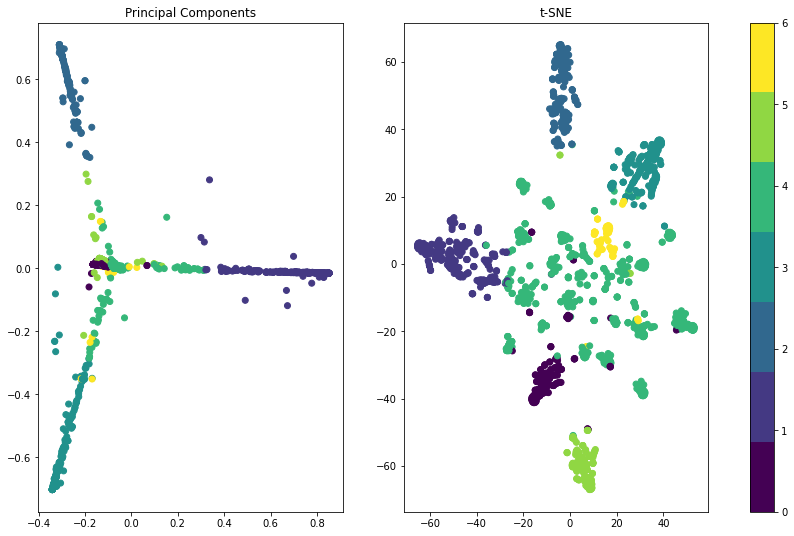

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')
plot1 = axs[0].scatter(reducer_01[:,0], reducer_01[:,1], c=cluster_predictions, cmap=plt.cm.get_cmap('viridis',7))
plot2 = axs[1].scatter(reducer_02[:,0], reducer_02[:,1], c=cluster_predictions, cmap=plt.cm.get_cmap('viridis',7))
fig.colorbar(plot2, ax=axs);


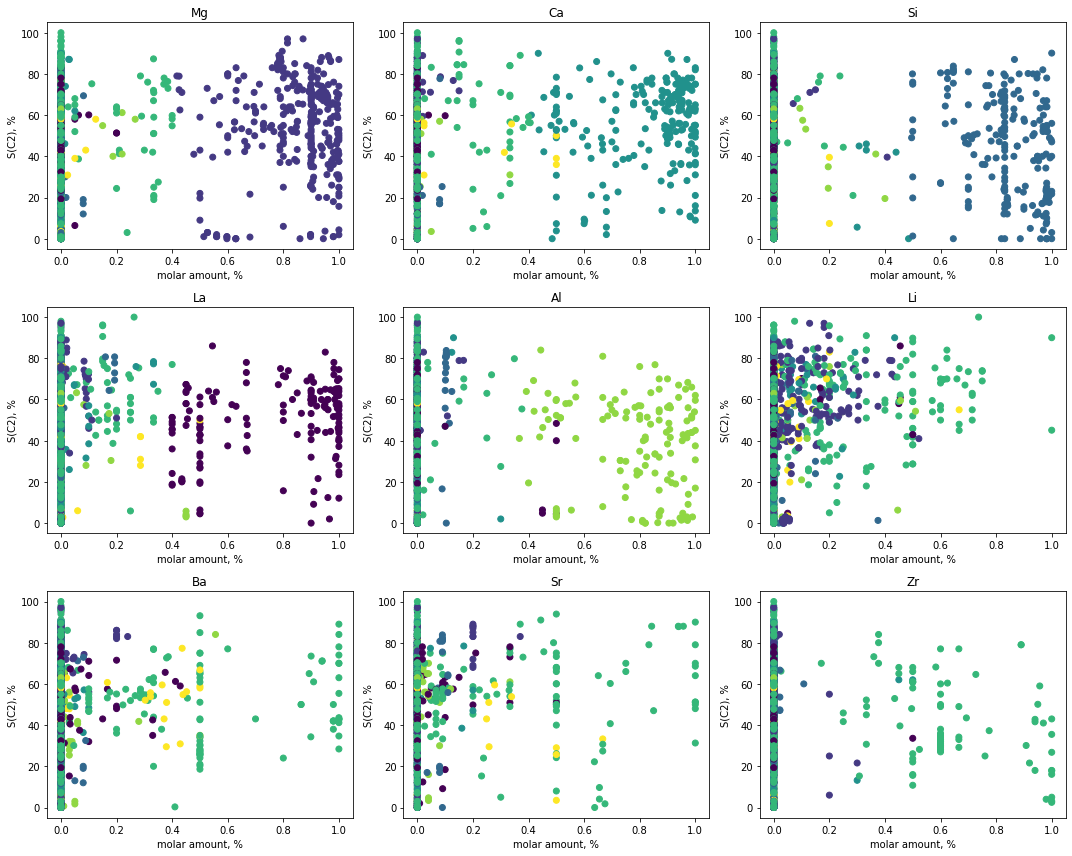

In [ ]:
#Coloring of the original composition by the cluster number

elements = composition.mean(axis=0).sort_values(ascending=False).head(9).keys()

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,12))
# fig.subplots_adjust(wspace=0.3, hspace=0.3)
for count, ax in enumerate(axs.flat):
    ax.set_title(elements[count])
    ax.set_xlabel('molar amount, %')
    ax.set_ylabel('S(C2), %')
    ax.scatter(data_cleaned[elements[count]],data_cleaned['S(C2), %'],c=cluster_predictions, cmap=plt.cm.get_cmap('viridis', 7))

# cb = fig.colorbar(plot, ax=axs)
plt.tight_layout()
plt.show()

# Supervised Learning



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = composition.fillna(value=0).astype(np.float)
Y = data_cleaned.iloc[:,-2].fillna(value=2).astype(np.float)/100

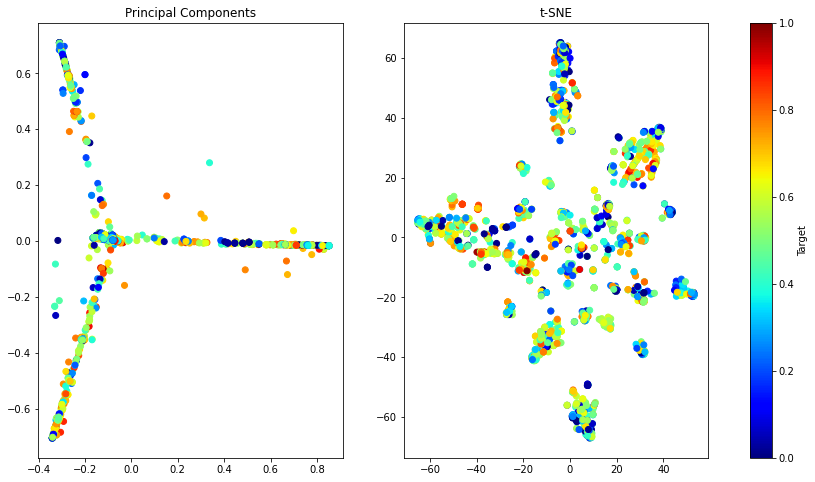

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')
plot1 = axs[0].scatter(reducer_01[:,0], reducer_01[:,1], c=Y, cmap='jet')
plot2 = axs[1].scatter(reducer_02[:,0], reducer_02[:,1], c=Y, cmap='jet')

cbar = fig.colorbar(plot2, ax=axs)
cbar.set_label('Target')
plt.show()

### Train-Test Split
The train-test split is performed to separate your dataset into two distinct subsets. The train set is used to forge your model, whereas the test set, which was **never** used during training, is used to validate the built model.

For more information, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Support Vector Machine (SVM)
SVM's are a powerful method that can be used for regression, classification and outlier detection tasks.

For more details, please refer to https://scikit-learn.org/stable/modules/svm.html

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyper_params_svr = {'gamma':np.random.normal(12, 2, 10000),'C':np.random.normal(1, 0.2, 10000)}

In [ ]:
svr_tune = SVR('rbf')
g_search = RandomizedSearchCV(svr_tune, hyper_params_svr, cv=5, n_jobs=-1, random_state=42)
g_search.fit(X_train, Y_train); 

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
Best Estimator SVR(C=1.1408377488023944, gamma=13.661055845099215)


In [ ]:
print('Best Estimator ', g_search.best_estimator_)

Best Estimator  SVR(C=1.1408377488023944, gamma=13.661055845099215)


--------------------

In [ ]:
best_C = g_search.best_estimator_.C
best_gamma = g_search.best_estimator_.gamma

svr_rbf = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

In [ ]:
Y_svr = svr_rbf.fit(X_train, Y_train)

In [ ]:
predict_svr_train = Y_svr.predict(X_train) 

Now let's have a look at the predictions using our test set:



In [ ]:
predict_svr = Y_svr.predict(X_test)

In [ ]:
print('Score on the training set:', Y_svr.score(X_train, Y_train))
print('Score on test set:', Y_svr.score(X_test, Y_test))


Score on the training set: 0.6271868140394987
Score on test set: 0.2759377373643078


The score is 63%.

Let's visualize the outcome of the SVM regression:

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_test, predict_svr)
plt.title('Support Vector Machine, S(C2), %')
plt.xlabel('True Values [%]')
plt.ylabel('Predictions [%]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);


NameError: name 'plt' is not defined

## Random Forest

The random forest is an algorithm based on ensemble learning. It consists of multiple decision trees joined to form a more powerful prediction model, hence creating a *forest of trees*. Similar to the SVM, the random forest algorithm can be used for both regression and classification tasks.

In what follows, let's focus on applying a **Random Forest Regression** (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
hyper_params_rdf = {'n_estimators':[10,50,100,200]}

In [ ]:
rdf_tune = RandomForestRegressor()

In [ ]:
g_search_rdf = RandomizedSearchCV(rdf_tune, hyper_params_rdf, cv=5, n_jobs=-1, random_state=42)

In [ ]:
g_search_rdf.fit(X_train, Y_train);

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
print('Best Estimator ', g_search_rdf.best_estimator_)


Best Estimator  RandomForestRegressor(n_estimators=60)


In [ ]:
estimators = g_search_rdf.best_estimator_.n_estimators

In [ ]:
regressor = RandomForestRegressor(n_estimators=estimators, random_state=42)

In [ ]:
regressor.fit(X_train, Y_train);

In [ ]:
#we can make predictions with the trained algorithm and calculate the score for the training and the test

In [ ]:
Y_pred_train = regressor.predict(X_train)

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
print('Score on training set:', regressor.score(X_train, Y_train))

Score on training set: 0.8356544969794336


In [ ]:
print('Score on test set:', regressor.score(X_test, Y_test))

Score on test set: 0.30793043962461675


Let's visualize the Random Forest Regression outcome :

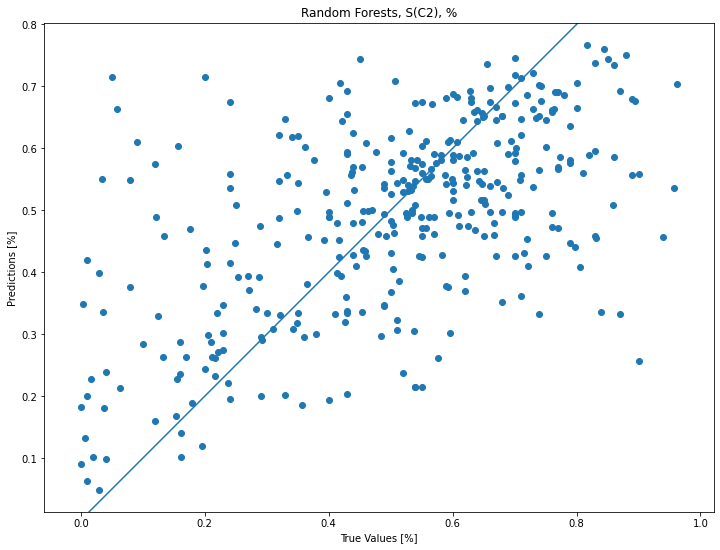

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_test, Y_pred)
plt.title('Random Forests, S(C2), %')
plt.xlabel('True Values [%]')
plt.ylabel('Predictions [%]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);


In [ ]:
#Dataset comparision -- Calculations

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mse_rdf_train = mean_squared_error(Y_train,Y_pred_train)
mse_rdf_test = mean_squared_error(Y_test,Y_pred)

In [ ]:
mse_svr_train = mean_squared_error(Y_train, predict_svr_train)
mse_svr_test = mean_squared_error(Y_test,predict_svr)

In [ ]:
r2_rdf_train = r2_score(Y_train,Y_pred_train)
r2_rdf_test = r2_score(Y_test,Y_pred)

In [ ]:
r2_svr_train = r2_score(Y_train, predict_svr_train)
r2_svr_test = r2_score(Y_test,predict_svr)

In [ ]:
#Visulization -- 

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
ann = mpatches.Patch(color='k', label='Random Forests')
svr = mpatches.Patch(color='m', label='Support Vector Regression')

In [ ]:
names = ['train', 'test', 'train’, ‘test']
pos = range(len(names))
colors = ['k', 'k', 'm', 'm']
rotation = 0

In [ ]:
pos

range(0, 3)

<BarContainer object of 4 artists>

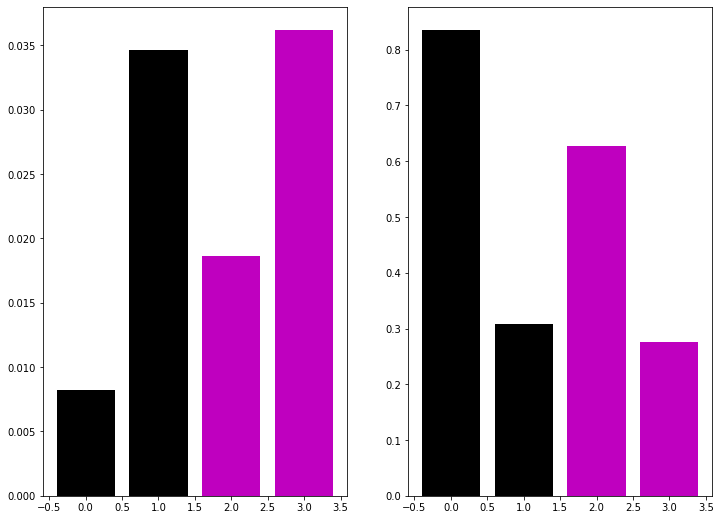

In [ ]:
fig, axes = plt.subplots(figsize=(12,9), ncols=2)
# plt.subtitle('Overall metrics', y=1.02)
# plt.subplot(121)
ax = axes[0]
ax.bar(np.arange(4), [mse_rdf_train, mse_rdf_test, mse_svr_train, mse_svr_test], color=colors)
# plt.xticks(pos, names,rotation=rotation)
plt.ylabel('mean squared error')
# plt.subplot(122)
ax = axes[1]
ax.bar(np.arange(4), [r2_rdf_train,r2_rdf_test, r2_svr_train, r2_svr_test], color=colors)
# plt.xticks(pos, names, rotation=rotation)
# plt.ylabel('R2 score')
# plt.tight_layout()
# plt.legend(loc='upper center', handles=[ann, svr], ncol=3, bbox_to_anchor=(-0.1, -0.05));

In [ ]:
#Cross Validation:

In [ ]:
svr_mean_cv_score = g_search.cv_results_['mean_test_score' ]
rdf_mean_cv_score = g_search_rdf.cv_results_['mean_test_score']


In [ ]:
print(svr_mean_cv_score)

[0.22588494 0.22355266 0.22313363 0.2245305  0.22536237 0.22322608
 0.22402677 0.22614719 0.22440094 0.22446761]


In [ ]:
print(rdf_mean_cv_score)

[ 0.24801785  0.29386368 -0.19879585  0.2975906   0.26314957  0.27639638
  0.30124984  0.08674225  0.29371613  0.24367047]


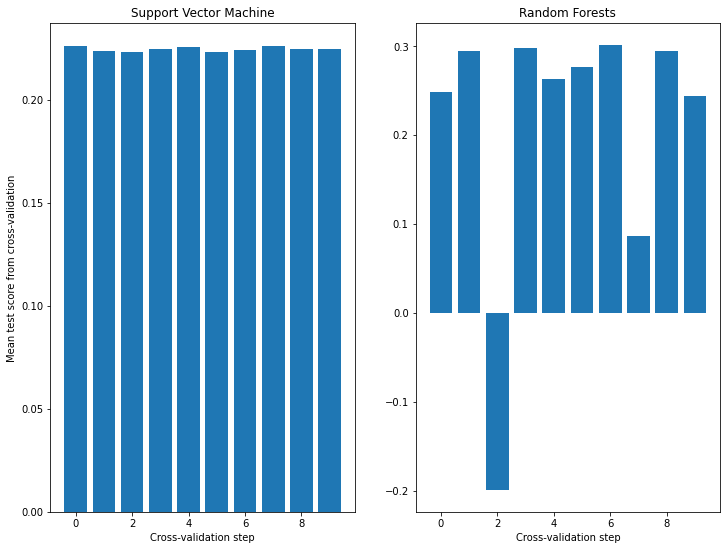

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.xlabel('Cross-validation step')
plt.ylabel('Mean test score from cross-validation')
plt.title('Support Vector Machine')
plt.bar(x=range(0, len(svr_mean_cv_score)),height=svr_mean_cv_score)
plt.subplot(122)
plt.xlabel('Cross-validation step')
plt.title('Random Forests')
plt.bar(x=range(0, len(rdf_mean_cv_score)),height=rdf_mean_cv_score);


In [ ]:
#Feature selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
select_features = SelectFromModel(RandomForestRegressor(n_estimators=estimators))
select_features.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=14))

In [ ]:
selected_features= X_train.columns[(select_features.get_support())]

In [ ]:
print(selected_features)

Index(['Al', 'Ba', 'C', 'Ca', 'Ce', 'Cl', 'Co', 'Fe', 'K', 'La', 'Li', 'Mg',
       'Mn', 'Na', 'Ni', 'P', 'Pb', 'Si', 'Sr', 'Ti', 'W', 'Zr'],
      dtype='object')


In [ ]:
######Excercise Section#########

In [ ]:
#####Deep Learning from Tensor flow as Benchmark

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
## Neural Network 

In [ ]:
model = keras.Sequential([layers.Dense(73, activation='relu',input_shape=[X_train.shape[1]]),layers.Dropout(0.2),
layers.Dense(73, activation='relu'),
layers.Dropout(0.2),
layers.Dense(73, activation='relu'),
layers.Dropout(0.2),
layers.Dense(1)
                         ])

In [ ]:
model.compile(loss='mae', optimizer='rmsprop');

In [ ]:
#Lets see how NN model looks like

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 73)                5037      
_________________________________________________________________
dropout (Dropout)            (None, 73)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 73)                5402      
_________________________________________________________________
dropout_1 (Dropout)          (None, 73)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 73)                5402      
_________________________________________________________________
dropout_2 (Dropout)          (None, 73)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7

In [ ]:
model.fit(X_train, Y_train, epochs=500, validation_split = 0.1, verbose=0);

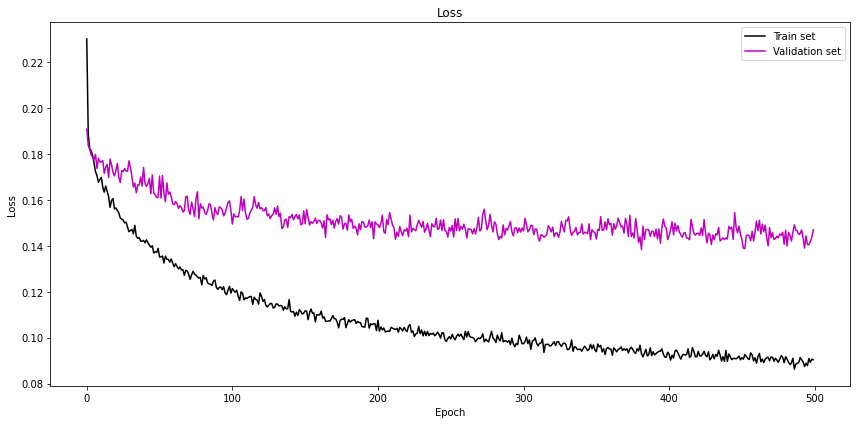

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(model.history.epoch, np.array(model.history.history['loss']),
'k', label='Train set')
plt.plot(model.history.epoch, np.array(model.history.history
['val_loss']), 'm', label='Validation set')
plt.legend()
plt.tight_layout()

          

In [ ]:
predict_on_train = model.predict(X_train).flatten()
predict_on_test = model.predict(X_test).flatten()

print('Score on training set:', r2_score(Y_train, predict_on_train))
print('Score on test set:', r2_score(Y_test, predict_on_test))

Score on training set: 0.6865220056100945
Score on test set: 0.22760670132593197


In [ ]:
#68 % on training data but only 23% on test data

In [ ]:
#----------------------------------------OLD CODES-----------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print('Numpy Version',np.__version__)

Numpy Version 1.20.3


In [ ]:
print('Numpy Version',np.__version__)

Numpy Version 1.19.5


In [ ]:
#Similarly we can check the other version of the library, try this---

In [ ]:
print('Pandas Version',pd.__version__)

Pandas Version 1.2.4


In [ ]:
#We need one more ML framework for implementing deep learning 
#which is called tensorflow

In [ ]:
#Lets import it here

In [ ]:
import tensorflow as tp

In [ ]:
#Which version of the tensorflow library are we using?

In [ ]:
print('Tensorflow Version',tp.__version__)

Tensorflow Version 2.5.0


In [ ]:
#To ensure reprodicibility we can use an arbitary value for the random
#seed in the random number generator
#we can set an arbiraty value of 42 as the random seed here

In [ ]:
np.random.seed(42)

In [ ]:
pd.set_option('display.max_columns', 5) #to make it more readable

In [ ]:
#Now lets download our data 

In [ ]:
#we can put the data url in a variable url

In [ ]:
url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-019-08325-8/MediaObjects/41467_2019_8325_MOESM3_ESM.xls'

In [ ]:
#Now lets access the first row of data from with 'head' function of Pandas

In [ ]:
raw_data = pd.read_excel(url, sheet_name=1)
print(raw_data.head())

   Catalyst Nr  Nr of publication  ...   S(C2), %  Y(C2), %
0            1                  1  ...  45.500000    5.0050
1            2                  1  ...  40.000000    4.0000
2            3                  1  ...   4.800000    0.4032
3            4                  1  ...  44.099998    2.9988
4            5                  1  ...   1.300000    0.1040

[5 rows x 33 columns]


In [ ]:
#Lets use features present in the data and organise and rearragne it 
#for the easy use of ML algorithms

In [ ]:
#We can use the pivot function and to sort every column of the original dataset with 
#respect to elements

In [ ]:
cation1 = raw_data.pivot(columns='Cation 1', values='Cation 1 mol%')

In [ ]:
#Lets repeat this for the remaining cations, anion and supports


In [ ]:
cation2 = raw_data.pivot(columns='Cation 2', values='Cation 2 mol%')

In [ ]:
cation3 = raw_data.pivot(columns='Cation 1', values='Cation 1 mol%')
cation4 = raw_data.pivot(columns='Cation 1', values='Cation 1 mol%')
anion1 = raw_data.pivot(columns='Anion 1', values='Anion 1 mol%')
anion2 = raw_data.pivot(columns='Anion 2', values='Anion 2 mol%')
support1 = raw_data.pivot(columns='Support 1', values='Support 1 mol%')
support2 = raw_data.pivot(columns='Support 2', values='Support 2 mol%')

In [ ]:
#We need to create a pivot_list which holds the single pivoted tables

In [ ]:
pivot_lists = [cation1, cation2, cation3, cation4, anion1, anion2, support1, support2]

In [ ]:
#With the help of concat function we can combine all the pivoted table to a huge
#list

In [ ]:
concat_pivot_lists = pd.concat(pivot_lists, axis=1, sort=True)

In [ ]:
#Now we can generate the composition dataframe, we can divide the 
#concat_pivot_lists dataframe by hundred and put it in a new dataframe

In [ ]:
composition = concat_pivot_lists.groupby(level=0, axis=1).sum()/100

In [ ]:
#we can print this dataframe with print command

In [ ]:
print(composition.head())

    Ag     Al  ...   Zn   Zr
0  0.0  0.908  ...  0.0  0.0
1  0.0  0.953  ...  0.0  0.0
2  0.0  0.955  ...  0.0  0.0
3  0.0  0.896  ...  0.0  0.0
4  0.0  0.972  ...  0.0  0.0

[5 rows x 66 columns]


In [ ]:
#We can see the dataframe is now formatted by chemical elements with molar ratio

In [ ]:
#we can now use Pandas iloc function to extract the publication 
#number and reaction conditions

In [ ]:
pub_nr = raw_data.iloc[:,0]

In [ ]:
reaction_data = raw_data.iloc[:,19:]

In [ ]:
#Now using concat function to generate the sinfgle dataset

In [ ]:
cleaned_list = [pub_nr,composition,reaction_data]
data_cleaned = pd.concat(cleaned_list,axis=1,sort=True)

In [ ]:
#Data inspection 

In [ ]:
#We can claculate the mean of all the elements in composition and then sort and select first 18 
#rows using the keys attribute of the dataframe

In [ ]:
print(composition.mean(axis=0).sort_values(ascending=False).head(18).keys())

Index(['Ca', 'La', 'Mg', 'Si', 'Li', 'Ba', 'Al', 'Na', 'Sr', 'Zr', 'Sm', 'Nd',
       'K', 'Y', 'Ce', 'Mn', 'Pb', 'Ti'],
      dtype='object')


In [ ]:
#For visulatization we will use the matplotlib which was imported as plt
#for visualizing any existing trend in the dataset

In [ ]:
#Lets take 9 elements which occupy most of the dataset and plot the selectricity toward C2 for each of these elements

In [ ]:
count = 1
max_val = len(composition.mean(axis=0).sort_values(ascending=False).head(9).keys())

In [ ]:
#Lets start Unsupervised Learning, in this type of ML systems the
#algorithms doesn't see the output values of the dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
k_ellbow = []
for E in range(1,21):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(composition)
    score = kmeans.score(composition)
    k_ellbow.append(score)

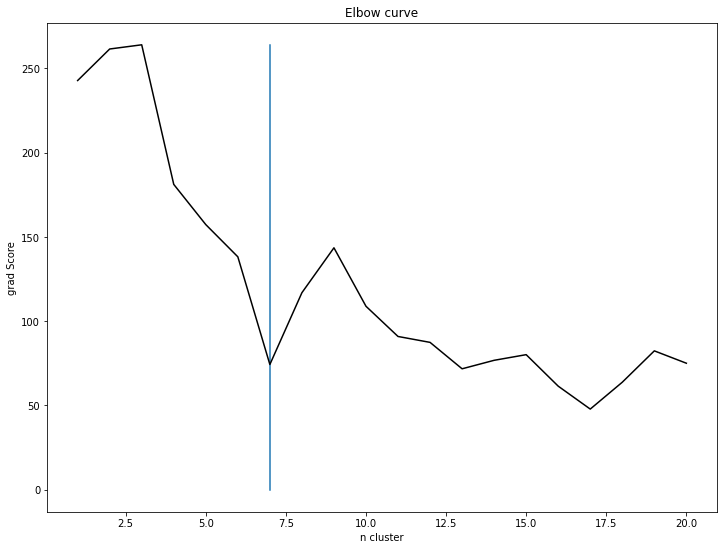

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Elbow curve')
plt.xlabel('n cluster')
plt.ylabel('grad Score')
plt.plot([7,7],[0,np.max(np.gradient(k_ellbow))])
plt.plot(range(1,21), np.gradient(k_ellbow), 'k');

In [ ]:
count = 1
max_val = len(composition.mean(axis=0).sort_values(ascending=False).head(9).keys())

In [ ]:
#Plotting the data reveals no relationships

<ipython-input-25-0cd5c9ac0320>:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.sqrt(max_val),np.sqrt(max_val), count)


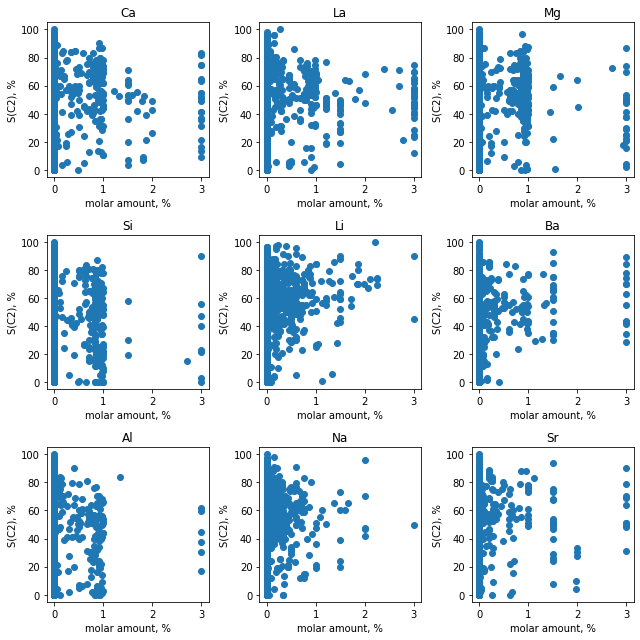

In [ ]:
plt.figure(figsize=(9,9))
for element in composition.mean(axis=0).sort_values(ascending=False).head(9).keys():
    plt.subplot(np.sqrt(max_val),np.sqrt(max_val), count)
    plt.title(element)
    plt.xlabel('molar amount, %')
    plt.ylabel('S(C2), %')
    plt.scatter(data_cleaned[element], data_cleaned['S(C2), %'])
    count += 1
plt.tight_layout()

In [ ]:
# Now the dataset we are using has 68 columns and 1802 entries and
#its a 68 dimensional dataset and not easy to do a 2D visualization

In [ ]:
#Lets use Kmeans Cluster prediction
cluster = KMeans(n_clusters=7)
cluster.fit(composition)
cluster_predictions = cluster.predict(composition)

In [ ]:
# So for reducing the dimentionality, we can do Principal Component
#Analysis

In [ ]:
pca = PCA(n_components=2)

In [ ]:
reducer_01 = pca.fit_transform(composition)

In [ ]:
#Using the TSNE algorithm

In [ ]:
tsne = TSNE(n_components=2, random_state=42, init='pca')
reducer_02 = tsne.fit_transform(composition)


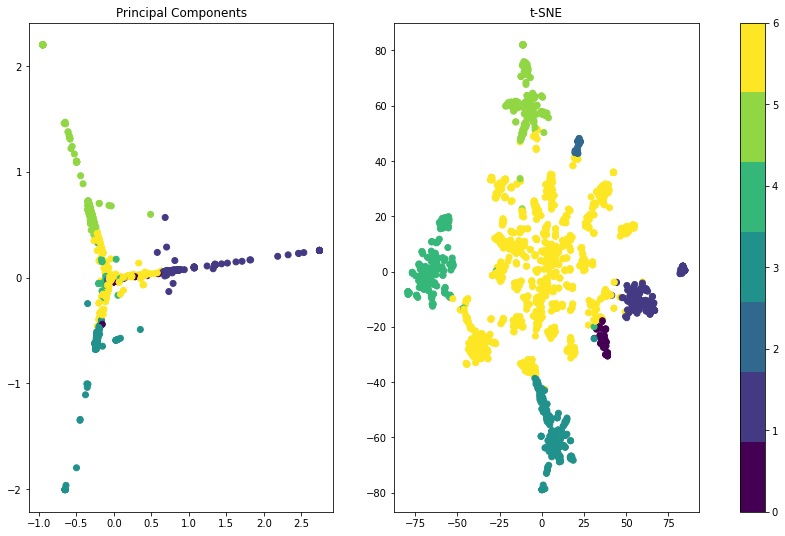

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,9))
axs[0].set_title('Principal Components')
axs[1].set_title('t-SNE')
plot1 = axs[0].scatter(reducer_01[:,0],reducer_01[:,1],c=cluster_predictions, cmap=plt.cm.get_cmap('viridis',7))
plot2 = axs[1].scatter(reducer_02[:,0],reducer_02[:,1],c=cluster_predictions, cmap=plt.cm.get_cmap('viridis',7))
fig.colorbar(plot2, ax=axs);


In [ ]:
#Coloring the elements occuring with the highest amount in the dataset with respect to the cluster analysis

In [ ]:
#Put maybe more explanations here???

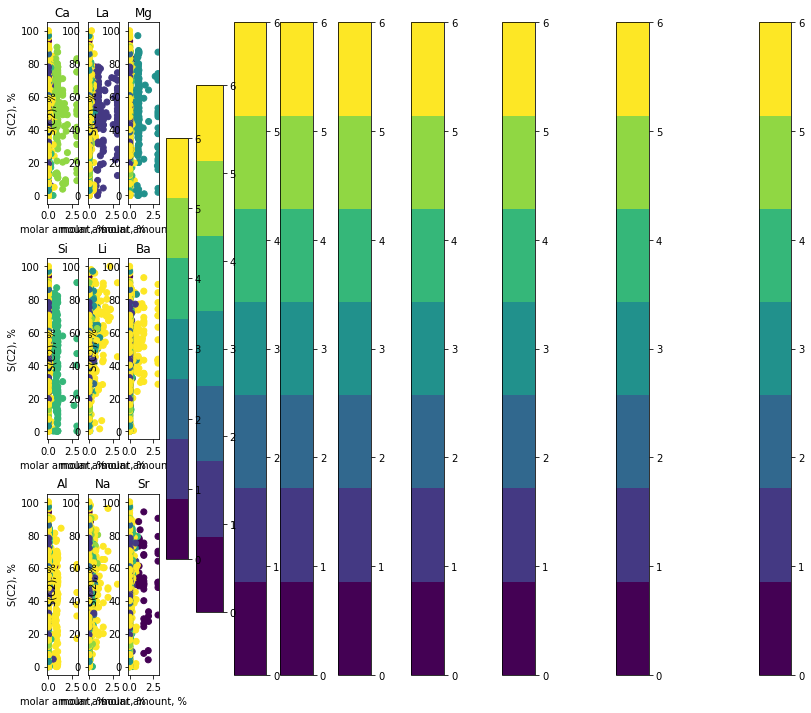

In [ ]:
count = 0
elements = composition.mean(axis=0).sort_values(ascending=False).head(9).keys()
fig, axs = plt.subplots(3,3, figsize=(15,12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for ax in axs.flat:
    ax.set_title(elements[count])
    ax.set_xlabel('molar amount, %')
    ax.set_ylabel('S(C2), %')
    plot = ax.scatter(data_cleaned[elements[count]],data_cleaned['S(C2), %'],c=cluster_predictions, cmap=plt.cm.get_cmap('viridis', 7))
    count += 1
    cb = fig.colorbar(plot, ax=axs)
    plt.savefig('toc.png');

In [ ]:
#Check the above code for bugs

In [ ]:
#Supervised Learning code:

In [ ]:
#Importing the train test from sk_learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(42) # The random_state=42 is not working here...

In [ ]:
X = composition.fillna(value=0).astype(np.float)
Y = data_cleaned.iloc[:,2].fillna(value=0).astype(np.float)/100
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
# Now we can use the support vector machine

In [ ]:
#import the module with

In [ ]:
from sklearn.svm import SVR 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Setting the hyperparameters

In [ ]:
hyper_params_svr = {'gamma':np.random.normal(12,2,10000),'C':np.random.normal(1,0.2,10000)}

In [ ]:
svr_tune = SVR('rbf')
g_search = RandomizedSearchCV(svr_tune, hyper_params_svr, cv=5,n_jobs=-1,random_state=42)
g_search.fit(X_train, Y_train);
print('Best Estimator', g_search.best_estimator_)

/home/sourav/Desktop/pyprog/my_project_env/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass kernel=rbf as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Best Estimator SVR(C=0.9576208028663284, gamma=11.051098152964189)


In [ ]:
#Now lets fix the the parameters 

In [ ]:
best_C = g_search.best_estimator_.C
best_gamma = g_search.best_estimator_.gamma
svr_rbf = SVR(kernel='rbf', C=best_C, gamma=best_gamma)

In [ ]:
#Now the training begins

In [ ]:
y_svr = svr_rbf.fit(X_train, Y_train)

In [ ]:
#Lets see the performance of the train model

In [ ]:
predict_svr_train = y_svr.predict(X_train)
predict_svr = y_svr.predict(X_test)

In [ ]:
print('Score on training set:', y_svr.score(X_train, Y_train))
print('Score on test set:', y_svr.score(X_test, Y_test))

      

Score on training set: -27.550956548629117
Score on test set: -34.03067128021227


NameError: name 'p1t' is not defined

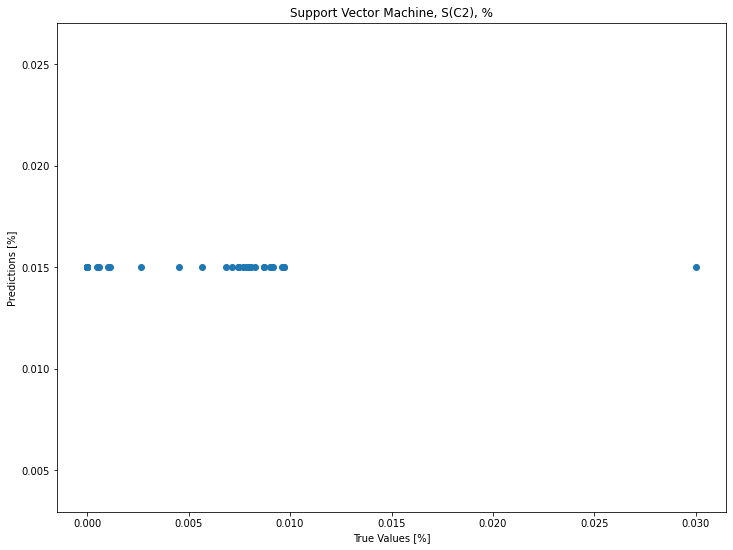

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(Y_test, predict_svr)
plt.title('Support Vector Machine, S(C2), %')
plt.xlabel('True Values [%]')
plt.ylabel('Predictions [%]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(p1t.ylim())
plt.plot([-1000, 1000], [-1000, 1000]);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=14efe349-dfdf-4f39-adf8-11a6b4d62abd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>